# Support Vector Machines 

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.

## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired us to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.


**Our overall goal is to use the wine dataset shown below to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features.**

---
---

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../DATA/wine_fraud.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


**Lets find out - What are the unique variables in the target column we are trying to predict (quality)?**

In [4]:
display(df['quality'].unique())

array(['Legit', 'Fraud'], dtype=object)

**We create a countplot that displays the count per category of Legit vs Fraud. Is the label/target balanced or unbalanced?**

In [5]:
display(df['quality'].value_counts())

quality
Legit    6251
Fraud     246
Name: count, dtype: int64

In [6]:
100*df['quality'].value_counts()/len(df) ### so in the dataset ~4% of the wine is labelled as fraud

quality
Legit    96.213637
Fraud     3.786363
Name: count, dtype: float64

<Axes: xlabel='quality', ylabel='count'>

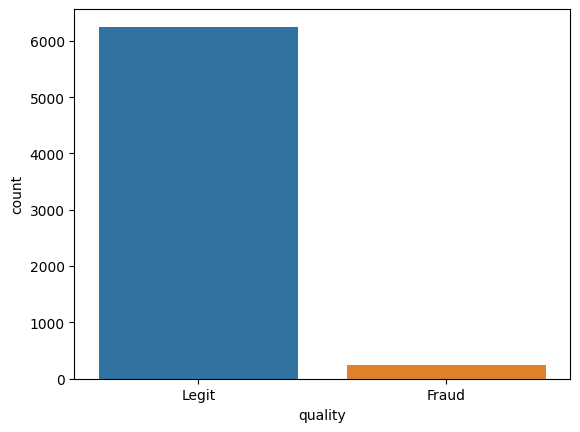

In [7]:
sns.countplot(data=df,x='quality',hue='quality')

**Let's find out if there is a difference between red and white wine when it comes to fraud. Create a countplot that has the wine *type* on the x axis with the hue separating columns by Fraud vs Legit.**

<Axes: xlabel='type', ylabel='count'>

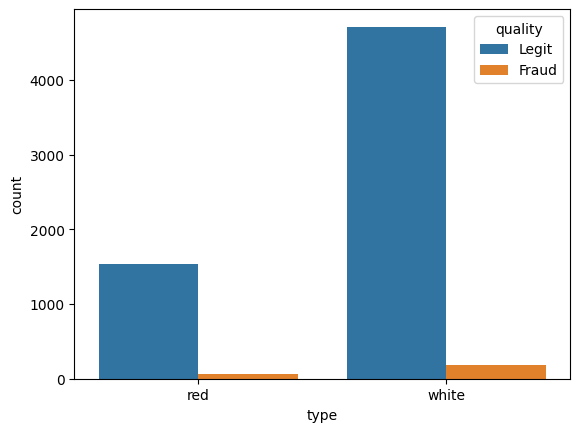

In [8]:
sns.countplot(data=df,x='type',hue='quality')

**Let's find out what percentage of red wines and white wines are fraud respectively?**

In [9]:
df.groupby('type')['quality'].value_counts()

type   quality
red    Legit      1536
       Fraud        63
white  Legit      4715
       Fraud       183
Name: count, dtype: int64

In [10]:
100*df.groupby('type')['quality'].value_counts()/len(df) 
### in total the dataset ~1% of the red wine and ~3% of white wine is labelled as fraud


type   quality
red    Legit      23.641681
       Fraud       0.969678
white  Legit      72.571956
       Fraud       2.816685
Name: count, dtype: float64

In [11]:
display(df.loc[df['type'] == 'red']['quality'].value_counts())

pct_fraud_red = 100 * df.loc[df['type'] == 'red']['quality'].value_counts()['Fraud'] / len(df.loc[df['type'] == 'red']['quality'])
print(f'Percentage of fraud in Red Wines: {pct_fraud_red}')

quality
Legit    1536
Fraud      63
Name: count, dtype: int64

Percentage of fraud in Red Wines: 3.9399624765478425


In [12]:
display(df.loc[df['type'] == 'white']['quality'].value_counts())

pct_fraud_white = 100 * df.loc[df['type'] == 'white']['quality'].value_counts()['Fraud'] / len(df.loc[df['type'] == 'white']['quality'])
print(f'Percentage of fraud in Red Wines: {pct_fraud_white}')

quality
Legit    4715
Fraud     183
Name: count, dtype: int64

Percentage of fraud in Red Wines: 3.736218864842793


**We then calculate the correlation between the various features and the "quality" column. To do this we map the column to 0 and 1 instead of a string.**

In [13]:
df['quality_num'] = 0
df.loc[df['quality'] == 'Fraud', 'quality_num'] = 1
display(df['quality'].value_counts())
df['quality_num'].value_counts()

quality
Legit    6251
Fraud     246
Name: count, dtype: int64

quality_num
0    6251
1     246
Name: count, dtype: int64

In [14]:
df.drop(['quality','type'],axis=1).corr()['quality_num']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
quality_num             1.000000
Name: quality_num, dtype: float64

**Let's create a bar plot of the correlation values to Fraudlent wine.**

array([-0.08520433, -0.06178946, -0.05114074, -0.04875596, -0.0352524 ,
       -0.03404621,  0.01635128,  0.02010727,  0.02179396,  0.03449946,
        0.15122798,  1.        ])

(-0.2, 1.0)

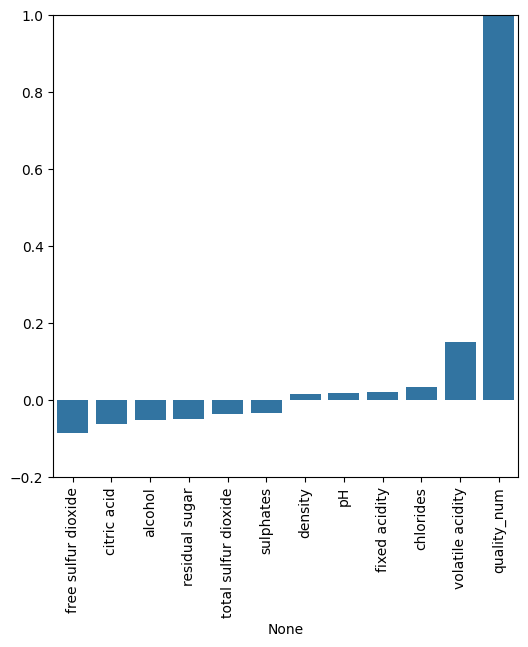

In [15]:
corr_ser = df.drop(['quality','type'],axis=1).corr()['quality_num'].sort_values()
display(corr_ser.values)
plt.figure(figsize=(6,6))
sns.barplot(x=corr_ser.index, y=corr_ser.values)
plt.xticks(rotation=90);
plt.ylim(-0.2,1.0)

**Let's create a clustermap with seaborn to explore the relationships between variables.**

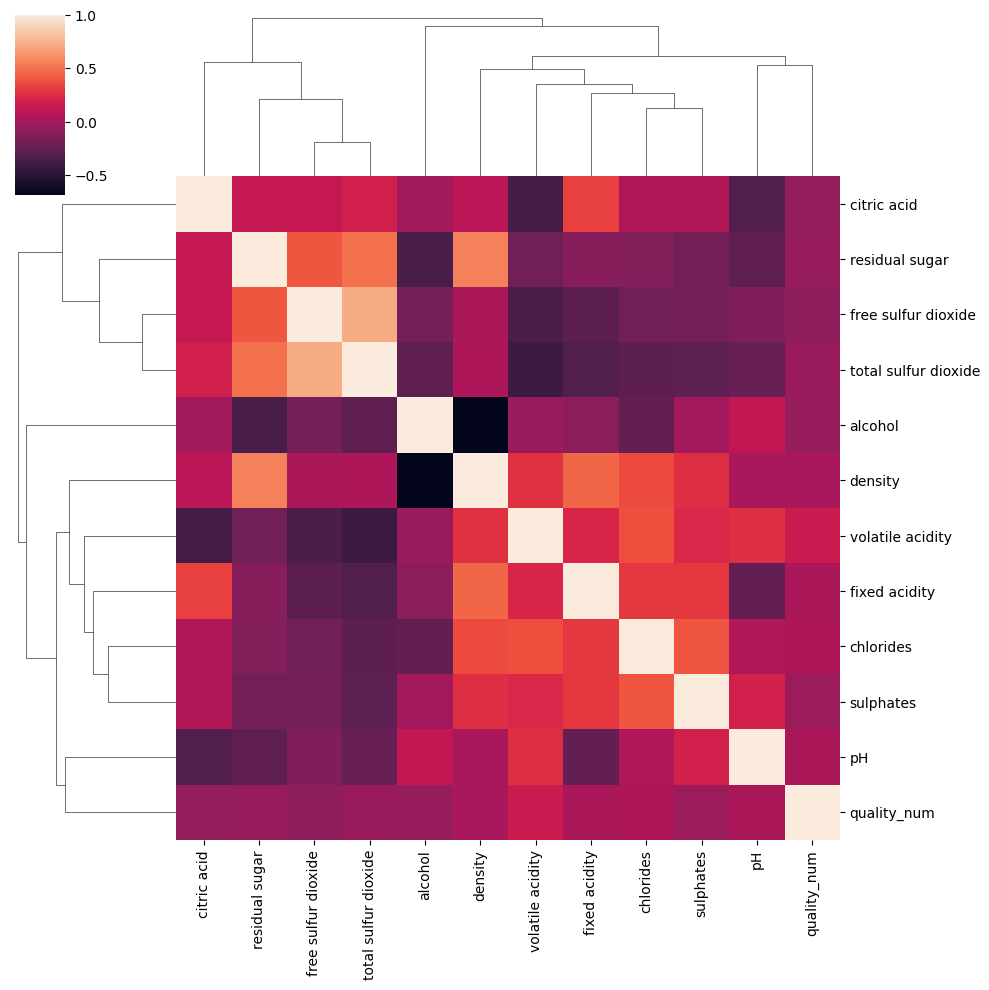

In [16]:
sns.clustermap(data=df.drop(['type','quality'], axis=1).corr())

----
## Machine Learning Model

**Let's now convert the categorical column "type" from a string or "red" or "white" to dummy variables:**

In [17]:
dummies = pd.get_dummies(df['type'],drop_first=True, dtype=int)
print(f'Dummy Variables DataFrame: {dummies}')

df = pd.concat([df, dummies], axis=1)
df['white']
df = df.drop('type', axis=1)

Dummy Variables DataFrame:       white
0         0
1         0
2         0
3         0
4         0
...     ...
6492      1
6493      1
6494      1
6495      1
6496      1

[6497 rows x 1 columns]


**Separate out the data into X features and y target label ("quality" column)**

In [18]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_num', 'white'],
      dtype='object')

In [19]:
X = df.drop(['quality','quality_num'],axis=1)
y = df['quality']

**We perform a Train|Test split on the data, with a 10% test size and a random state of 101**

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Scale the X train and X test data.**

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

**We create an instance of a Support Vector Machine classifier. We already know that the classes are unbalanced, in an attempt to help alleviate this issue, we can automatically adjust weights inversely proportional to class frequencies in the input data with a argument call in the SVC() call.**

In [22]:
from sklearn.svm import SVC
model = SVC(class_weight='balanced')

**As previous models, we use a GridSearchCV to run a grid search for the best C and gamma parameters.**

In [23]:
from sklearn.metrics import get_scorer_names

available_scorers = get_scorer_names()
# available_scorers
print(f"available scorers: {available_scorers}")

available scorers: ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'd2_absolute_error_score', 'd2_brier_score', 'd2_log_loss_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_max_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
# from sklearn.metrics import mean_absolute_error, root_mean_squared_error, make_scorer

In [ ]:
param_grid = {'C':[0.01,0.05,0.1,0.5,0.75,0.9,1], 'gamma':['scale','auto']}
# scorers = {
#     'mean_absolute_error': make_scorer(mean_absolute_error),
#     'root_mean_squared_error': make_scorer(root_mean_squared_error)
# }

In [27]:
grid_model = GridSearchCV(model,param_grid=param_grid)

In [28]:
grid_model.fit(scaled_X_train,y_train)
grid_model.best_params_

{'C': 1, 'gamma': 'auto'}

**Let's check out the confusion matrix and classification report for our model.**

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [30]:
y_pred = grid_model.predict(scaled_X_test)

In [31]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 17,  10],
       [ 92, 531]])

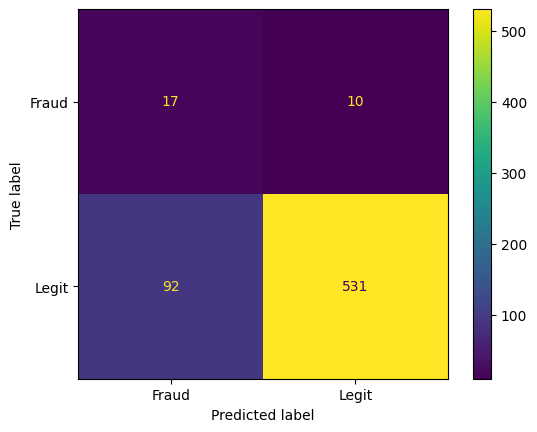

In [32]:
disp = ConfusionMatrixDisplay(cm,display_labels=grid_model.classes_)
disp.plot()

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



**From all of this, how well this model actually perform, should it be used and will it realistically work?**

When we actually try to find the fraudulent wine using the set of features available to us, the precision and recall is quite poor. 

Now to think on it, is it because we made some mistake while training the model? 

When you have a proper look at it, that does not seem to be the case. 

Wine quality analysis using Machine learning is a good first step in the process but just having features from the chemical analysis perspective don't seem be much helpful in the predictions/ training the model to increase scoring metrics.

Thus, it can be improved by expanding the feature set to other areas of domain expertise (eg: label detection/ quality, etc.) and wine fraud detection.